# PySpark e Streaming de Dados


## Spark Streaming
O Spark Streaming foi lançado em 2013 para permitir que engenheiros de dados e cientistas de dados processassem dados em tempo real de bancos de dados SQL, Flume, Amazon Kinesis etc. Streams discretos, ou DStreams, são abstrações fundamentais aqui, pois representam fluxos de dados divididos em pequenos pedaços (referidos como lotes).

A proposta do Spark Stream é analisar dados em tempo real, e não esperar horas para fazer a análise e processamento. "A vida não acontece em batches".
Streaming de dados não é apenas para projetos altamente especializados. Computação baseada em Streaming está se tornando a regra para empresas orientadas a dados.

O Spark Streaming ganhou rápida adoção por causa de seus diferentes recursos de processamento de dados, pois facilitar para os desenvolvedores de big data confiar em uma única estrutura usando uma única estrutura para atender a todos os requisitos de processamento é fácil para os desenvolvedores de big data. Os modelos podem ser treinados offline usando MLlib (biblioteca de aprendizado de máquina do Spark) e, em seguida, usados online para pontuação de dados de streaming usando o Spark Streaming. Alguns modelos podem aprender e pontuar continuamente enquanto os dados de streaming são coletados. Além disso, o Spark SQL permite combinar dados de streaming com uma ampla variedade de fontes de dados estáticos. Por exemplo, o Amazon Redshift pode carregar dados estáticos no Spark e processá-los antes de enviá-los para sistemas downstream.

<img src="assets/figura01.png">

Uma das principais fontes de dados contínuos são os sensores, da internet das coisas. Existem quatro areas principais que o Spark Streaming vem sendo utilizado:

* Streaming ETL;
* Detecção de anomalias;
* Enriquecimento de dados;
* Sessões complexas e aprendizado contínuo.

Uma importante vantagem de usar o Spark para Big Data Analytics é a possibilidade de combinar processamento em batch e processamento de streaming em um único sistema.

* **Batch**: Você inicia o processamento de um arquivo ou dataset finito, o spark processa as tarefas configuradas e conclui o trabalho.
* **Streaming**: Você processa um stream de dados contínuos; a execução não pára até que haja algum erro ou você termine a aplicação manualmente.


## Exemplos de Casos de uso do Apache Spark Streaming

Existem mais de 3.000 empresas que usam o Spark Streaming, incluindo empresas como Zendesk, Uber, Netflix e Pinterest:

1. Para criar análises de telemetria em tempo real, a Uber coleta terabytes de dados de eventos todos os dias de seus usuários móveis. Os dados brutos do evento podem ser convertidos em dados estruturados coletados usando um pipeline ETL contínuo baseado em Kafka, Spark Streaming e HDFS.

2. Um pipeline de dados semelhante foi criado para o Pinterest para alimentar dados do Kafka no Spark via Spark Streaming, fornecendo informações imediatas sobre como os pinos interagem globalmente em tempo real. Ele ajuda o Pinterest a melhorar suas recomendações em tempo real, sugerindo Pins relacionados aos usuários enquanto eles navegam no site em busca de lugares para ir, produtos para comprar, receitas para preparar e muito mais.

3. Um mecanismo em tempo real que fornece recomendações de filmes para usuários da Netflix é construído com Kafka e Spark Streaming, que a Netflix usa para lidar com bilhões de eventos por dia de várias fontes.



## DStreams: Discretized Streams

Assim como os RDDs são a base do Apache Spark, os DStreams são a base do Apache Spark Streaming.
O dstream é uma sequência de dados que são coletados ao longo do tempo. Internamente, um dstream é representado por uma sequência de RDDs coletados em cada intervalo de tempo. Pode ser criado por diversas fontes, como Kafka, Flume, Twitter, etc..
Uma vez que são criados, os dstreams oferecem dois tipos e operações:

* **Transformações**: Geram um novo dstream;
* **Ações (operações de output)**: Gravam os dados em um sistema de armazenamento ou outra fonte externa. Os DStreams oferecem muitas das operações que podem ser realizadas com os RDDs, mais operações relacionadas ao tempo, como sliding windows.

<img src="assets/figura02.png">

**O que pode ser feito com DStreams:**
* Map;
* FlatMap;
* Filter;
* ReduceByKey;
* Join;
* Window;
* Manter o controle de estado dos dados (Stateful Data)

**Windowing** (Computação em uma janela de tempo): A cada janela de tempo, um RDD é criado no DStream, podemos querer ver o que acontece em um determinado intervalo de tempo.

* **Window length**: Duração da window;
* **Sliding interval**: Intervalo entre as windows.

Exemplo de uso:

> `ssc = StreamingContext(sc, INTERVALO_BATCH);`<br/>
> `window(windowDuration: Duration, slideDuration: Duration): DStream[T]`

Windowing permite computar os resultados ao longo de períodos de tempo maiores que o batch interval.

São três os intervalos de tempo que devemos considerar ao trabalhar com streaming:

* Batch interval: Frequência com que os dados são capturados em um DStream;
* Frequência com que uma window é aplicada;
* Intervalo de tepo capturado para computação e geração de resultados;

**Principais mecanismos de tolerância a falhas:**

* Todos os dados são replicados para no mínimo 2 worker nodes;
* **ssc.checkpoint()**: Um diretório de checkpoint pode ser usado para armazenar o estado do streaming de dados, no caso em que é necessário reiniciar o streaming.
* **Falha no Receiver**: Alguns receivers são melhores que outros. Receiver como Twitter, Kafka e Flume não permitem recuperação de dados. Se o receiver falha, os dados do streaming são perdidos. Outros garantem a recuperação dos dados em caso de falhas: HDFS, Directly-consumed Kafka, Pull-based Flume.
* **Falha no Driver Context**: Embora os dados sejam replicados para os worker nodes, o DriverContext é executado no node master e este pode ser um ponto único de falha. Podemos usar o checkpoint() para recuperar dados em caso de falhas e usamos a função streamingContext.getOrCreate() para continuar o processamento de onde ele foi interrompido em caso de falha. Em caso de falha no script sendo executado no DriverContext, podemos reiniciar automaticamente o processo de streaming, usando o Zookeeper (no modo supervise). O zookeeper é um cluster manager usado pelo spark.

## Referências

* [1] **PROJECTPRO**. *A Beginners Guide to Spark Streaming Architecture with Example*, 2022. Disponível em <<a target="_blank" href="https://www.projectpro.io/article/spark-streaming-example/540">ProjectPro.com/spark-streaming-guide</a>>


* [2] **APACHE SPARK**. *Structured Streaming Programming Guide*, 2022. Disponível em: <<a target="_blank" href="https://spark.apache.org/docs/latest/structured-streaming-programming-guide.html">spark.apache.org/structured-streaming-programming-guide.</a>>

---

## Exemplos de Streaming de Dados


### Exemplo 1: Coletando dados do Twitter via socket e exibindo no console em tempo real

Este pode ser considerado um dos exemplos mais simples de uso do Spark Streaming. Neste exemplo nós vamos coletar os dados que virão diretamente da porta 5554. Nessa porta por sua vez estará sendo executada a aplicação responsável por coletar os dados do Twitter em tempo real.

Aqui neste projeto nós iremos aplicar os métodos de mapreduce para separar as palavras obtidas em cada tweet. Por fim, as palavras já transformadas serão exibidas no console do Jupyter Notebook.

In [1]:
from pyspark import SparkContext
from pyspark.streaming import StreamingContext

# Criação de um StreamingContext local com as threads de trabalho e intervalo de batch de 1 segundo
ssc = StreamingContext(sc, 1)

# Criação de um DStream que se conectará ao hostname:port, como por exemplo: localhost:9999
lines = ssc.socketTextStream("127.0.0.1", 5554)

In [2]:
# Divida cada linha em palavras
words = lines.flatMap(lambda line: line.split(" "))

# Conte cada palavra em cada lote
pairs = words.map(lambda word: (word, 1))
wordCounts = pairs.reduceByKey(lambda x, y: x + y)

# Imprima os primeiros dez elementos de cada RDD gerado neste DStream para o console
wordCounts.pprint(10)

Execute a aplicação **tweets-listener.py** no terminal.

In [3]:
# Inicia o listen
ssc.start()

# Aguardar o término do listen ou o limite de 120 segundos
ssc.awaitTerminationOrTimeout(120)  

# Encerra o Listen
ssc.stop()

-------------------------------------------
Time: 2022-10-14 08:47:10
-------------------------------------------

-------------------------------------------
Time: 2022-10-14 08:47:11
-------------------------------------------

-------------------------------------------
Time: 2022-10-14 08:47:12
-------------------------------------------

-------------------------------------------
Time: 2022-10-14 08:47:13
-------------------------------------------

-------------------------------------------
Time: 2022-10-14 08:47:14
-------------------------------------------

-------------------------------------------
Time: 2022-10-14 08:47:15
-------------------------------------------

-------------------------------------------
Time: 2022-10-14 08:47:16
-------------------------------------------

-------------------------------------------
Time: 2022-10-14 08:47:17
-------------------------------------------

-------------------------------------------
Time: 2022-10-14 08:47:18
----------

-------------------------------------------
Time: 2022-10-14 08:47:46
-------------------------------------------
('słabi', 1)
('i', 1)
('im', 1)
('😁@PercyRajani', 1)
('mistake', 1)
('was', 1)
('listening', 1)
('he', 1)
('whistleblowers,', 1)
('whistles', 1)
...

-------------------------------------------
Time: 2022-10-14 08:47:47
-------------------------------------------
('was', 1)
('do.…RT', 1)
('@apmassaro3:', 1)
('like', 2)
('pay', 1)
('an', 1)
('Was', 1)
('in', 2)
('Welt.', 1)
('BC', 1)
...

-------------------------------------------
Time: 2022-10-14 08:47:48
-------------------------------------------
('"Not', 1)
('nuclear', 1)
('needs', 1)
('investigated.RT', 1)
('24', 1)
('region', 1)
('are', 1)
('adoptive', 1)
('in', 1)
('Novosibirsk,', 1)
...



---

### Exemplo 2: Coletando dados do Twitter via socket e exibindo um gráfico em tempo real

Agora iremos aplicar mais de técnicas para que possamos obter informações mais úteis do Streaming de dados. Neste exemplo vamos realizar mais operações de MapReduce a fim de obter somente as palavras com hashtags e realizar uma contagem da quantidade de vezes que cada hashtag aparece no total de tweets em tempo real.

In [1]:
from pyspark import SparkContext
from pyspark.streaming import StreamingContext
from pyspark.sql import SQLContext
from pyspark.sql.functions import desc
from collections import namedtuple

In [2]:
# Esta célula só pode ser executada uma única vez, reinicie o kernel sempre que fizer alguma alteração.

# Iniciando StreamingContext
ssc = StreamingContext(sc, 10 )
# Iniciando SQL Context para que seja possível realizar operações do SparkSQL
sqlContext = SQLContext(sc)
socket_stream = ssc.socketTextStream("127.0.0.1", 5554)

# Realizando a computação em janela.
lines = socket_stream.window( 100 )

# O dataframe terá duas colunas: A tag em si e a quantidade de vezes que ela aparece.
fields = ("tag", "count" )

Tweet = namedtuple( 'Tweet', fields )
( lines.flatMap( lambda text: text.split( " " ) ) # Aplicando flatmap para dividir o texto em palavras
     .filter( lambda word: word.lower().startswith("#"))  # Filtrando e selecionando somente os textos que começam por #
     .map( lambda word: ( word.lower(), 1 ) ) # Mapeando o texto e transformando tudo em letras minúsculas
     .reduceByKey( lambda a, b: a + b ) # Aplicando reduce por chaves
     .map( lambda rec: Tweet( rec[0], rec[1] ) ) # Vamos começar a criar a tabela temporária
     .foreachRDD( lambda rdd: rdd.toDF().sort( desc("count") ) # Para cada rdd converta para dataframe e ordena de maneira decrescente por count
     .limit(20).registerTempTable("tweets") ) ) # Obtenha somente os primeiros registros e registre na tabela temporária chamada "tweets"

Execute a aplicação **tweets-listener.py** no terminal.

In [3]:
# Iniciando o Listen
ssc.start()

In [4]:
# Importando as bibliotecas para exibição de gráficos no Python e no Notebook.

import time
from IPython import display
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

O procedimento será realizado dez vezes, para cada vez iremos selecionar o estado atual da tabela temporária tweets e exibir um gráfico de barras com as principais hashtags mencionadas.

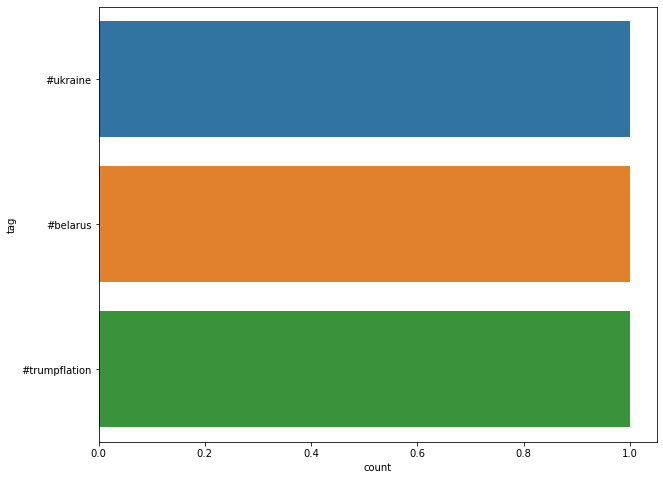

In [9]:
count = 0
while count < 10:
    
    # Aguarde 5 segundos
    time.sleep(5)

    # Selecione tag e count da tabela tweets
    top_10_tweets = sqlContext.sql( 'Select tag, count from tweets' )

    # Converta para pandas
    top_10_df = top_10_tweets.toPandas()

    # Limpe o console
    display.clear_output(wait=True)

    # Configra e exibe o barplot do Seaborn
    plt.figure( figsize = ( 10, 8 ) )
    sns.barplot( x="count", y="tag", data=top_10_df)
    plt.show()
    
    count = count + 1

In [6]:
# Caso você queira exibir o dataframe atual
tweets = sqlContext.sql( 'Select * from tweets' )
df = tweets.toPandas()

df.head(15)

,tag,count
0,"#nucleararmageddon,",1
1,#putin,1
2,#russia,1
3,#arestladomiciliu,1
4,#mesaj,1
5,#russia-occupied,1
6,#russian,1
7,#camera.,1
8,#venezuelaespoesía,1
9,#gosloto,1


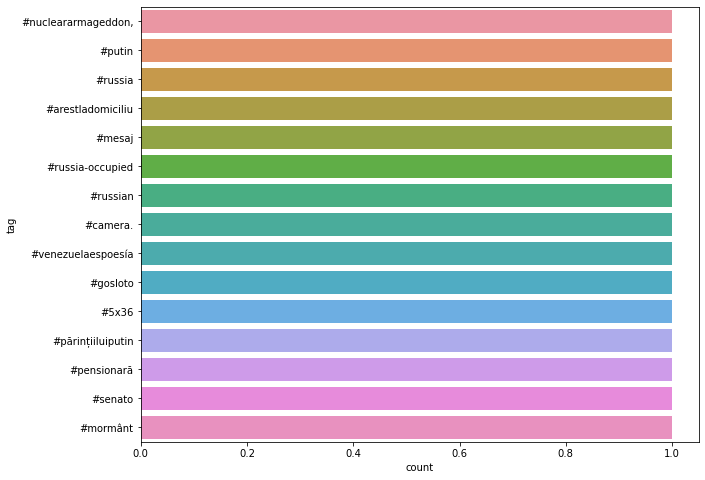

In [8]:
plt.figure( figsize = ( 10, 8 ) )
sns.barplot( x="count", y="tag", data=df)
plt.show()

In [10]:
# Encerre o Listen
ssc.stop()  

---

Neste notebook foram apresentados os conceitos por trás do Spark Streaming e também dois exemplos de como aplicar a coleta de dados via streaming de dados utilizando o Spark Streaming.

No projeto Tweeter Streaming será desenvolvido uma aplicação de Machine Learning que classifica os tweets como sendo positivos ou negativos. Os dados também serão coletados em tempo real do Twitter e iremos coletar os dados direto sem a utilização de sockets.